##Question 1: Network Compression using SVD

Importing library files, disabling warnings and reading the MNIST dataset

In [0]:
%tensorflow_version 1.x
import os
import glob
import pickle
import librosa
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
n_nodes_h1 = 1024
n_nodes_h2 = 1024
n_nodes_h3 = 1024
n_nodes_h4 = 1024
n_nodes_h5 = 1024

In [0]:
n_classes = 10
batch_size = 300

#height x weight
x = tf.placeholder('float',[None, 784])
y = tf.placeholder('float')
initializer = tf.random_normal_initializer()
bias_init = tf.zeros_initializer()

input_dim = 784

def neural_network_model(data):

    hidden_1_layer = {'weights': tf.Variable(initializer([input_dim,n_nodes_h1])),
                     'biases': tf.Variable(bias_init([n_nodes_h1]))}
    
    hidden_2_layer = {'weights': tf.Variable(initializer([n_nodes_h1,n_nodes_h2])),
                     'biases': tf.Variable(bias_init([n_nodes_h2]))}
    
    hidden_3_layer = {'weights': tf.Variable(initializer([n_nodes_h2,n_nodes_h3])),
                     'biases': tf.Variable(bias_init([n_nodes_h3]))}
    
    hidden_4_layer = {'weights': tf.Variable(initializer([n_nodes_h3,n_nodes_h4])),
                     'biases': tf.Variable(bias_init([n_nodes_h4]))}
    
    hidden_5_layer = {'weights': tf.Variable(initializer([n_nodes_h4,n_nodes_h5])),
                     'biases': tf.Variable(bias_init([n_nodes_h5]))}
    
    output_layer = {'weights': tf.Variable(initializer([n_nodes_h5,n_classes])),
                     'biases': tf.Variable(bias_init([n_classes]))}
    
    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']),hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']),hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']),hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weights']),hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_5_layer['weights']),hidden_5_layer['biases'])
    l5 = tf.nn.relu(l5)
    
    output = tf.matmul(l5,output_layer['weights']) + output_layer['biases']
    
    return l1,l2,l3,l4,l5,output

In [0]:

prediction_l1,prediction_l2,prediction_l3,prediction_l4,prediction_l5,prediction = neural_network_model(x)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = prediction,labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

hm_epochs = 20

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(hm_epochs):
    epoch_loss = 0

    for _ in range(int(mnist.train.num_examples/batch_size)):
      epoch_x, epoch_y = mnist.train.next_batch(batch_size)
      _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
      epoch_loss += c

    correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct,'float'))

    print('Epoch', epoch+1, 'completed out of', hm_epochs, 'loss:', epoch_loss, 'Accuracy:', accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))


Epoch 1 completed out of 20 loss: 3189269175.5 Accuracy: 0.6853
Epoch 2 completed out of 20 loss: 833312243.25 Accuracy: 0.8008
Epoch 3 completed out of 20 loss: 545752036.375 Accuracy: 0.8436
Epoch 4 completed out of 20 loss: 412647805.125 Accuracy: 0.8657
Epoch 5 completed out of 20 loss: 329995977.75 Accuracy: 0.8768
Epoch 6 completed out of 20 loss: 272104342.375 Accuracy: 0.886
Epoch 7 completed out of 20 loss: 226613852.125 Accuracy: 0.893
Epoch 8 completed out of 20 loss: 192514779.90625 Accuracy: 0.8977
Epoch 9 completed out of 20 loss: 163263046.625 Accuracy: 0.9018
Epoch 10 completed out of 20 loss: 137969729.75 Accuracy: 0.9059
Epoch 11 completed out of 20 loss: 118127623.859375 Accuracy: 0.907
Epoch 12 completed out of 20 loss: 100531864.2578125 Accuracy: 0.91
Epoch 13 completed out of 20 loss: 86600886.25 Accuracy: 0.9125
Epoch 14 completed out of 20 loss: 71087507.0703125 Accuracy: 0.9143
Epoch 15 completed out of 20 loss: 61722327.37890625 Accuracy: 0.9137
Epoch 16 compl

In [0]:
variables = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
variables

[<tf.Variable 'Variable:0' shape=(784, 1024) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(1024, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_12:0' shape=(784, 20) dtype=float32_ref>,
 <tf.Variable 'Variable_13:0' shape=(20, 1024) dtype=float32_ref>,
 <tf.Variable 'Variable_14:0' shape=(1024, 20) dtype=float32_ref>,
 <tf.Variable 'Vari

In [0]:
weight1 = variables[0]
bias1 = variables[1]

weight2 = variables[2]
bias2 = variables[3]

weight3 = variables[4]
bias3 = variables[5]

weight4 = variables[6]
bias4 = variables[7]

weight5 = variables[8]
bias5 = variables[9]

weight6 = variables[10]
bias6 = variables[11]

In [0]:
layer1_s,layer1_u,layer1_v = tf.svd(weight1)
layer2_s,layer2_u,layer2_v = tf.svd(weight2)
layer3_s,layer3_u,layer3_v = tf.svd(weight3)
layer4_s,layer4_u,layer4_v = tf.svd(weight4)
layer5_s,layer5_u,layer5_v = tf.svd(weight5)

In [0]:
#SVD Compression Loop Begins here
D = [10,20,50,100,200,'full']

In [0]:
  def compressed_neural_network_model(data,weight_p1,weight_p2,weight_p3,weight_p4,weight_p5,weight_p6,
                          bias1,bias2,bias3,bias4,bias5,bias6):
    
      hidden_1_layer = {'weights': weight_p1,
                      'biases': bias1}
      
      hidden_2_layer = {'weights': weight_p2,
                      'biases': bias2}
      
      hidden_3_layer = {'weights': weight_p3,
                      'biases': bias3}
      
      hidden_4_layer = {'weights': weight_p4,
                      'biases': bias4}
      
      hidden_5_layer = {'weights': weight_p5,
                      'biases': bias5}
      
      output_layer = {'weights': weight_p6,
                      'biases': bias6}

      l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']),hidden_1_layer['biases'])
      l1 = tf.nn.relu(l1)
      
      l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']),hidden_2_layer['biases'])
      l2 = tf.nn.relu(l2)
      
      l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']),hidden_3_layer['biases'])
      l3 = tf.nn.relu(l3)
      
      l4 = tf.add(tf.matmul(l3,hidden_4_layer['weights']),hidden_4_layer['biases'])
      l4 = tf.nn.relu(l4)
      
      l5 = tf.add(tf.matmul(l4,hidden_5_layer['weights']),hidden_5_layer['biases'])
      l5 = tf.nn.relu(l5)
      
      output = tf.matmul(l5,output_layer['weights']) + output_layer['biases']

      return l1,l2,l3,l4,l5,output

In [0]:
def svd(d_value):

  if d_value == 'full':

    weight_p1 = tf.Variable(tf.matmul(tf.matmul(layer1_u, tf.diag(layer1_s)), layer1_v, transpose_b=True))
    weight_p2 = tf.Variable(tf.matmul(tf.matmul(layer2_u, tf.diag(layer2_s)), layer2_v, transpose_b=True))
    weight_p3 = tf.Variable(tf.matmul(tf.matmul(layer3_u, tf.diag(layer3_s)), layer3_v, transpose_b=True))
    weight_p4 = tf.Variable(tf.matmul(tf.matmul(layer4_u, tf.diag(layer4_s)), layer4_v, transpose_b=True))
    weight_p5 = tf.Variable(tf.matmul(tf.matmul(layer5_u, tf.diag(layer5_s)), layer5_v, transpose_b=True))
    weight_p6 = weight6
  
  else:

    weight_p1 = tf.Variable(tf.matmul(tf.matmul(layer1_u[:,0:d_value], tf.diag(layer1_s[0:d_value])), layer1_v[:,0:d_value], transpose_b=True))
    weight_p2 = tf.Variable(tf.matmul(tf.matmul(layer2_u[:,0:d_value], tf.diag(layer2_s[0:d_value])), layer2_v[:,0:d_value], transpose_b=True))
    weight_p3 = tf.Variable(tf.matmul(tf.matmul(layer3_u[:,0:d_value], tf.diag(layer3_s[0:d_value])), layer3_v[:,0:d_value], transpose_b=True))
    weight_p4 = tf.Variable(tf.matmul(tf.matmul(layer4_u[:,0:d_value], tf.diag(layer4_s[0:d_value])), layer4_v[:,0:d_value], transpose_b=True))
    weight_p5 = tf.Variable(tf.matmul(tf.matmul(layer5_u[:,0:d_value], tf.diag(layer5_s[0:d_value])), layer5_v[:,0:d_value], transpose_b=True))
    weight_p6 = weight6

  #height x weight
  x = tf.placeholder('float',[None, 784])
  y = tf.placeholder('float')
  initializer = tf.random_normal_initializer()
  bias_init = tf.zeros_initializer()

  input_dim = 784

  prediction_l1,prediction_l2,prediction_l3,prediction_l4,prediction_l5,prediction = compressed_neural_network_model(x,weight_p1,weight_p2,weight_p3,weight_p4,weight_p5,weight_p6,
                          bias1,bias2,bias3,bias4,bias5,bias6)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = prediction,labels = y))
  optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

  hm_epochs = 20

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(hm_epochs):
      epoch_loss = 0

      
      for _ in range(int(mnist.train.num_examples/batch_size)):
        epoch_x, epoch_y = mnist.train.next_batch(batch_size)

        _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})

        epoch_loss += c

      correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
      accuracy = tf.reduce_mean(tf.cast(correct,'float'))

    test_images = mnist.test.images
    last_layer = sess.run(prediction,feed_dict = {x:test_images})
    count = 0
    for i in range(0,10000):
      
      if np.argmax(last_layer[i]) == np.argmax(mnist.test.labels[i]):
        count += 1
    
  return (count/10000)
  
   

In [0]:
accuracy_list = []
for i in D:
  print("D Value is",i)
  accuracy_list.append(svd(i))

D Value is 10
D Value is 20
D Value is 50
D Value is 100
D Value is 200
D Value is full


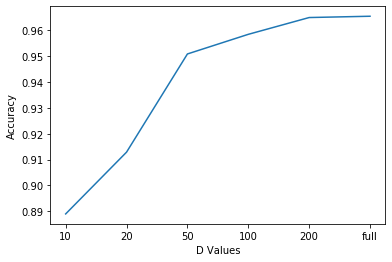

In [0]:
plt.plot(D, accuracy_list)
plt.xlabel('D Values')
plt.ylabel('Accuracy')
plt.show()

In [0]:
#Question 1.6
def new_neural_network_model(data,u_p1,u_p2,u_p3,u_p4,u_p5,v_p1,v_p2,v_p3,v_p4,v_p5,weight6,
                             bias1,bias2,bias3,bias4,bias5,bias6):
    
      hidden_1_layer = {'u_val': u_p1,
                        'v_val': v_p1,
                        'biases': bias1}
      
      hidden_2_layer = {'u_val': u_p2,
                        'v_val': v_p2,
                        'biases': bias2}
      
      hidden_3_layer = {'u_val': u_p3,
                        'v_val': v_p3,
                        'biases': bias3}
      
      hidden_4_layer = {'u_val': u_p4,
                        'v_val': v_p4,
                        'biases': bias4}
      
      hidden_5_layer = {'u_val': u_p5,
                        'v_val': v_p5,
                        'biases': bias5}
      
      output_layer = {'weights': weight6,
                      'biases': bias6}

      l1 = tf.add(tf.matmul(data,tf.matmul(hidden_1_layer['u_val'],hidden_1_layer['v_val'])),
                            hidden_1_layer['biases'])
      l1 = tf.nn.relu(l1)
      
      l2 = tf.add(tf.matmul(l1,tf.matmul(hidden_2_layer['u_val'],hidden_2_layer['v_val'])),
                            hidden_2_layer['biases'])
      l2 = tf.nn.relu(l2)
      
      l3 = tf.add(tf.matmul(l2,tf.matmul(hidden_3_layer['u_val'],hidden_3_layer['v_val'])),
                            hidden_3_layer['biases'])
      l3 = tf.nn.relu(l3)
      
      l4 = tf.add(tf.matmul(l3,tf.matmul(hidden_4_layer['u_val'],hidden_4_layer['v_val'])),
                            hidden_4_layer['biases'])
      l4 = tf.nn.relu(l4)
      
      l5 = tf.add(tf.matmul(l4,tf.matmul(hidden_5_layer['u_val'],hidden_5_layer['v_val'])),
                            hidden_5_layer['biases'])
      l5 = tf.nn.relu(l5)
      
      output = tf.matmul(l5,output_layer['weights']) + output_layer['biases']

      return l1,l2,l3,l4,l5,output

In [0]:
  u_p1,v_p1 = tf.Variable(layer1_u[:,0:20]), tf.Variable(tf.matmul(tf.diag(layer1_s[0:20]), layer1_v[:,0:20],transpose_b=True))
  u_p2,v_p2 = tf.Variable(layer2_u[:,0:20]), tf.Variable(tf.matmul(tf.diag(layer2_s[0:20]), layer2_v[:,0:20],transpose_b=True))
  u_p3,v_p3 = tf.Variable(layer3_u[:,0:20]), tf.Variable(tf.matmul(tf.diag(layer3_s[0:20]), layer3_v[:,0:20],transpose_b=True))
  u_p4,v_p4 = tf.Variable(layer4_u[:,0:20]), tf.Variable(tf.matmul(tf.diag(layer4_s[0:20]), layer4_v[:,0:20],transpose_b=True))
  u_p5,v_p5 = tf.Variable(layer5_u[:,0:20]), tf.Variable(tf.matmul(tf.diag(layer5_s[0:20]), layer5_v[:,0:20],transpose_b=True))
  weight_p6 = weight6

In [0]:
#height x weight
x = tf.placeholder('float',[None, 784])
y = tf.placeholder('float',[None, 10])
initializer = tf.random_normal_initializer()
bias_init = tf.zeros_initializer()

input_dim = 784

prediction_l1,prediction_l2,prediction_l3,prediction_l4,prediction_l5,prediction = new_neural_network_model(x,u_p1,u_p2,u_p3,u_p4,u_p5,v_p1,v_p2,v_p3,v_p4,v_p5,weight_p6,
                        bias1,bias2,bias3,bias4,bias5,bias6)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = prediction,labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)
correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct,'float'))

hm_epochs = 20

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(hm_epochs):

    epoch_loss = 0
    
    for _ in range(int(mnist.train.num_examples/batch_size)):
      epoch_x, epoch_y = mnist.train.next_batch(batch_size)

      _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
      accTest = accuracy.eval({x:mnist.test.images, y:mnist.test.labels})
      
      epoch_loss += c

    print('Epoch', epoch+1, 'completed out of', hm_epochs, 'Accuracy:', accTest)
      
  count = 0


Epoch 1 completed out of 20 Accuracy: 0.5776
Epoch 2 completed out of 20 Accuracy: 0.6676
Epoch 3 completed out of 20 Accuracy: 0.7139
Epoch 4 completed out of 20 Accuracy: 0.7366
Epoch 5 completed out of 20 Accuracy: 0.7551
Epoch 6 completed out of 20 Accuracy: 0.7626
Epoch 7 completed out of 20 Accuracy: 0.7823
Epoch 8 completed out of 20 Accuracy: 0.7531
Epoch 9 completed out of 20 Accuracy: 0.777
Epoch 10 completed out of 20 Accuracy: 0.8067
Epoch 11 completed out of 20 Accuracy: 0.7942
Epoch 12 completed out of 20 Accuracy: 0.8048
Epoch 13 completed out of 20 Accuracy: 0.8231
Epoch 14 completed out of 20 Accuracy: 0.8399
Epoch 15 completed out of 20 Accuracy: 0.8197
Epoch 16 completed out of 20 Accuracy: 0.8204
Epoch 17 completed out of 20 Accuracy: 0.818
Epoch 18 completed out of 20 Accuracy: 0.8448
Epoch 19 completed out of 20 Accuracy: 0.851
Epoch 20 completed out of 20 Accuracy: 0.832


##Question 2: RNN

In [0]:
#Mount the drive
from google.colab import drive, files
drive.mount('/content/drive')

In [0]:
def extractPickle(pickle_file , mag_pickle_file, file_path):
  if os.path.exists(pickle_file) and os.path.exists(mag_pickle_file):
    speech_list = pickle.load(open(pickle_file, 'rb'))
    mag_speech_list = pickle.load(open(mag_pickle_file, 'rb'))
    
    return speech_list , mag_speech_list
  
  else:
    speech_list = []
    mag_speech_list = []
    for file in sorted(glob.iglob(file_path)):
      s,sr = librosa.load(file , sr=None)
      S = librosa.stft(s, n_fft=1024, hop_length=512)
      speech_list.append(S)

      mag_S = np.abs(S)
      mag_speech_list.append(mag_S)

    pickle.dump(speech_list, open(pickle_file, 'wb'))
    pickle.dump(mag_speech_list, open(mag_pickle_file, 'wb'))
    
    return speech_list , mag_speech_list

In [0]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
folder_path = '/content/drive/My Drive/lstm/'

trs_path = folder_path + 'tr/trs*.wav'
trn_path = folder_path + 'tr/trn*.wav'
trx_path = folder_path + 'tr/trx*.wav'

vs_path = folder_path + 'v/vs*.wav'
vn_path = folder_path + 'v/vn*.wav'
vx_path = folder_path + 'v/vx*.wav'

tex_path = folder_path + 'te/tex*.wav'

trs_pickle = folder_path + 'trs_pickle.pkl'
mag_trs_pickle = folder_path + 'mag_trs_pickle.pkl'
trn_pickle = folder_path + 'trn_pickle.pkl'
mag_trn_pickle = folder_path + 'mag_trn_pickle.pkl'
trx_pickle = folder_path + 'trx_pickle.pkl'
mag_trx_pickle = folder_path + 'mag_trx_pickle.pkl'

vs_pickle = folder_path + 'vs_pickle.pkl'
mag_vs_pickle = folder_path + 'mag_vs_pickle.pkl'
vn_pickle = folder_path + 'vn_pickle.pkl'
mag_vn_pickle = folder_path + 'mag_vn_pickle.pkl'
vx_pickle = folder_path + 'vx_pickle.pkl'
mag_vx_pickle = folder_path + 'mag_vx_pickle.pkl'

tex_pickle = folder_path + 'tex_pickle.pkl'
mag_tex_pickle = folder_path + 'mag_tex_pickle.pkl'

trs_list, mag_trs_list = extractPickle(trs_pickle, mag_trs_pickle, trs_path)
print("Train signal loaded")
print(len(trs_list),len(mag_trs_list))

trn_list, mag_trn_list = extractPickle(trn_pickle, mag_trn_pickle, trn_path)
print("Train noise loaded")
print(len(trn_list),len(mag_trn_list))

trx_list, mag_trx_list = extractPickle(trx_pickle, mag_trx_pickle, trx_path)
print("Train mixed loaded")
print(len(trx_list),len(mag_trx_list))

vs_list, mag_vs_list = extractPickle(vs_pickle, mag_vs_pickle, vs_path)
print("Validation signal loaded")
print(len(vs_list),len(mag_vs_list))

vn_list, mag_vn_list = extractPickle(vn_pickle, mag_vn_pickle, vn_path)
print("Validation noise loaded")
print(len(vn_list),len(mag_vn_list))

vx_list, mag_vx_list = extractPickle(vx_pickle, mag_vx_pickle, vx_path)
print("Validation mixed loaded")
print(len(vx_list),len(mag_vx_list))

tex_list, mag_tex_list = extractPickle(tex_pickle, mag_tex_pickle, tex_path)
print("Test mixed loaded")
print(len(tex_list),len(mag_tex_list))

Train signal loaded
1200 1200
Train noise loaded
1200 1200
Train mixed loaded
1200 1200
Validation signal loaded
1200 1200
Validation noise loaded
1200 1200
Validation mixed loaded
1200 1200
Test mixed loaded
400 400


In [0]:
# All files are loaded
def IBM_Matrix(s_list,n_list):
  m_list = []
  for i in range(0,len(s_list)):
    m = 1*(s_list[i] > n_list[i]) 
    m_list.append(m)
  return m_list

In [0]:
M = IBM_Matrix(mag_trs_list,mag_trn_list)

In [0]:
#So we know that mag_trx_list will be your input and M should be your desired output
batch_size = 10
hm_epochs = 100

In [0]:
tf.reset_default_graph()
x = tf.placeholder('float',[None, None, 513])
y = tf.placeholder('float',[None, None, 513])

def lstm(data):

  lstm_cell = tf.contrib.rnn.LSTMCell(513, initializer=tf.contrib.layers.variance_scaling_initializer())
  drop_out = tf.nn.rnn_cell.DropoutWrapper(lstm_cell , output_keep_prob=0.9)
  lstm_output , state = tf.nn.dynamic_rnn(drop_out, data , dtype=tf.float32)
  output = tf.layers.dense(lstm_output , 513 , activation=tf.nn.sigmoid , kernel_initializer=tf.contrib.layers.variance_scaling_initializer())
  
  return output


In [0]:
prediction = lstm(x)
cost = tf.reduce_mean(tf.square(prediction-y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(hm_epochs):

    epoch_loss = 0

    for i in range(0,len(mag_trx_list),batch_size):

      epoch_x = [np.transpose(mag_trx_list[j]) for j in range(i,i+batch_size)]
      epoch_y = [np.transpose(M[j]) for j in range(i,i+batch_size)]

      epoch_x = np.array(epoch_x).reshape(batch_size,-1,513)
      epoch_y = np.array(epoch_y).reshape(batch_size,-1,513)

      _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
      epoch_loss += c
    
    average_loss = epoch_loss/(len(mag_trx_list))

    print('Epoch', epoch+1, 'completed out of', hm_epochs, 'loss:', average_loss)
  
  SNR_Array = []

  for i in range(len(mag_vx_list)):

    mag_vx_value = np.array([mag_vx_list[i].T])
    vx_value = np.array([vx_list[i].T])
    
    validation_output = sess.run(prediction,feed_dict = {x: mag_vx_value})
    s_predict = np.multiply(validation_output,vx_value)
    s_predict = s_predict.T[:,:,0]

    s_hat = librosa.istft(s_predict , hop_length=512 , win_length=1024)
    s = librosa.istft(vs_list[i] , hop_length=512 , win_length=1024)

    size = np.shape(s_hat)[0]
    num = np.dot(np.transpose(s),s)
    den = np.dot(np.transpose(s - s_hat),(s - s_hat))
    SNR = 10 * np.log10(num/den)
  
    SNR_Array.append(SNR)

  print("")
  print("Mean SNR:", np.mean(SNR_Array))



Epoch 1 completed out of 100 loss: 0.019253769268592198
Epoch 2 completed out of 100 loss: 0.015865754342327516
Epoch 3 completed out of 100 loss: 0.015143717477718989
Epoch 4 completed out of 100 loss: 0.014577611250181992
Epoch 5 completed out of 100 loss: 0.014151911350588004
Epoch 6 completed out of 100 loss: 0.013851975568880638
Epoch 7 completed out of 100 loss: 0.013540255576372147
Epoch 8 completed out of 100 loss: 0.013349853809922934
Epoch 9 completed out of 100 loss: 0.013146889004856348
Epoch 10 completed out of 100 loss: 0.012925438849876325
Epoch 11 completed out of 100 loss: 0.013117407939086358
Epoch 12 completed out of 100 loss: 0.012840820314983526
Epoch 13 completed out of 100 loss: 0.012470221612602472
Epoch 14 completed out of 100 loss: 0.012329267555226881
Epoch 15 completed out of 100 loss: 0.012239174582064152
Epoch 16 completed out of 100 loss: 0.012041758851458629
Epoch 17 completed out of 100 loss: 0.011935671102255583
Epoch 18 completed out of 100 loss: 0.01

In [0]:
  for i in range(len(mag_tex_list)):

    mag_tex_value = np.array([mag_tex_list[i].T])
    tex_value = np.array([tex_list[i].T])
    
    test_output = sess.run(prediction,feed_dict = {x: mag_tex_value})
    test_predict = np.multiply(test_output,tex_value)
    test_predict = test_predict.T[:,:,0]

    test_hat = librosa.istft(test_predict , hop_length=512 , win_length=1024)
    
    file_num = str(i).zfill(4)
    librosa.output.write_wav('test_audio_file_' + file_num + '.wav', test_hat, sr = 16000)
    files.download('test_audio_file_' + file_num + '.wav')